# Programming Assignment - 10
---
## Name:
---

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

import time

np.random.seed(100)
%matplotlib inline
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

## Question 1
---
Create the sparse COO representation ( [ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix)) of the adjacency matrix (no need to find the dense representation) of the following graph. Find its CSR representation using appropriate Python function. Visualize this matrix by using spy() function. Refer to the notebook of Lecture 10 live session. 

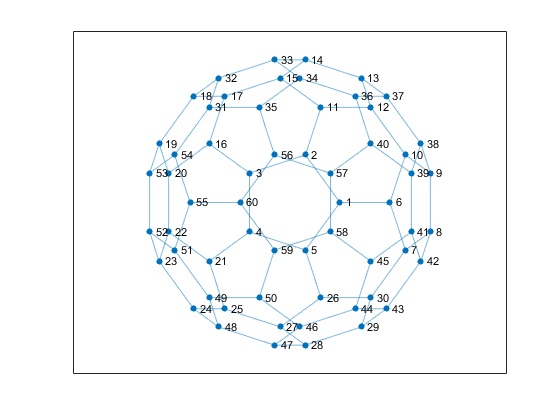

[Image source: Mathworks](https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png)

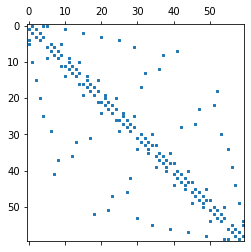

In [2]:
# Your code comes here
row = np.array([1,1,1, 2, 2, 2, 3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12,13,13,13,14,14,14,15,15,15,16,16,16,17,17,17,18,18,18,19,19,19,20,20,20,21,21,21,22,22,22,23,23,23,24,24,24,25,25,25,26,26,26,27,27,27,28,28,28,29,29,29,30,30,30,
31,31,31,32,32,32,33,33,33,34,34,34,35,35,35,36,36,36,37,37,37,38,38,38,39,39,39,40,40,40,41,41,41,42,42,42,43,43,43,44,44,44,45,45,45,46,46,46,47,47,47,48,48,48,49,49,49,50,50,50,
51,51,51,52,52,52,53,53,53,54,54,54,55,55,55,56,56,56,57,57,57,58,58,58,59,59,59,60,60,60])

col = np.array([2, 5, 6, 1, 3, 11, 2, 4, 16, 3, 5, 21, 1, 4, 26, 1, 7, 10, 6, 8, 30, 7, 9, 42, 8, 10, 38, 6, 9, 12, \
                2, 12, 15, 10, 11, 13, 12, 14, 37, 13, 15, 33, 11, 14, 17, 3, 17, 20, 15, 16, 18, 17, 19, 32, 18, 20, 53, 16, 19, 22, \
                4, 22, 25, 20, 21, 23, 22, 24, 52, 23, 25, 48, 21, 24, 27, 5, 27, 30, 25, 26, 28, 27, 29, 47, 28, 30, 43, 7, 26, 29, \
                32, 35, 54, 18, 31, 33, 14, 32, 34, 33, 35, 36, 31, 34, 56, 34, 37, 40, 13, 36, 38, 9, 37, 39, 38, 40, 41, 36, 39, 57, \
                39, 42, 45, 8, 41, 43, 29, 42, 44, 43, 45, 46, 41, 44, 58, 44, 47, 50, 28, 46, 48, 24, 47, 49, 48, 50, 51, 46, 49, 59, \
                49, 52, 55, 23, 51, 53, 19, 52, 54, 31, 53, 55, 51, 54, 60, 35, 57, 60, 40, 56, 58, 45, 57, 59, 50, 58, 60, 55, 56, 59])

data = np.array([1]*180)

coo_mat  = coo_matrix((data, (row-1,col-1)), shape=(60, 60))
P_csr = coo_mat.tocsc()
plt.spy(P_csr, marker='s', markersize=2)

## Question 2
---
>- Write a Python function that returns the dominating eigenvalue-eigenvector pair of a given square matrix by using the power method. 

>- Create a second version of the code that does the same for a sparse matrix given in CSR format.

>- Generate a random sparse matrix $A$ of uniformly distributed random numbers between -1 and 1 of order $100 \times 100$ which is around 95% sparse.

>- Call these two functions and compare the time it takes to calculate the dominating eigen-pair of $A$. Report your observation.

In [5]:
# Your code comes here
def power_method(A):
    v_old = np.random.rand(A.shape[1]) # Why should you choose randomly
    max_iter=1000
    for k in range(max_iter):
        v_new = A.dot(v_old)

        # Need to normalize
        v_new = v_new / np.linalg.norm(v_new)
        # Test for convergence
        v_old = v_new
        
    evalue = np.dot(v_new,A.dot(v_new))/np.linalg.norm(v_new)
    return v_new, evalue

In [10]:
def power_method_csr(A):
    v_old = np.random.rand(A.shape[1]) # Why should you choose randomly
    max_iter=100
    csrA=csr_matrix(A)
    for k in range(max_iter):
        v_new = csrA.dot(v_old)

        # Need to normalize
        v_new = v_new / np.linalg.norm(v_new)
        # Test for convergence
        v_old = v_new
        
    evalue = np.dot(v_new,csrA.dot(v_new))/np.linalg.norm(v_new)
    return v_new, evalue

In [8]:
A = np.array([[1/60, 1/60, 1/60, 1/60, 11/48, 1/60, 1/60, 1/60, 1/60],
          [3/10, 1/60, 3/10, 1/60, 1/60, 1/60, 1/60, 1/60, 1/60],
          [3/10, 53/120, 1/60, 1/60, 1/60, 1/60, 1/60, 1/60, 1/60],
          [1/60, 53/120, 3/10, 1/60, 11/48, 1/60, 1/60, 1/60, 1/60],
          [1/60, 1/60, 3/10, 3/10, 1/60, 1/60, 53/120, 1/60, 1/60],
          [3/10, 1/60, 1/60, 1/60, 11/48, 1/60, 1/60, 1/60, 1/60],
          [1/60, 1/60, 1/60, 3/10, 1/60, 53/120, 1/60, 1/60, 13/15],
          [1/60, 1/60, 1/60, 3/10, 1/60, 1/60, 53/120, 1/60, 1/60],
          [1/60, 1/60, 1/60, 1/60, 11/48, 53/120, 1/60, 13/15, 1/60]])
z,k = power_method(A)
#print(z.shape)
z = z / np.linalg.norm(z,ord=1)
print("The dominant eigenvector:\n", z)
print("Raking from lower to higher:",np.argsort(z)+1)

The dominant eigenvector:
 [0.04891378 0.04453755 0.04945403 0.08185422 0.15175114 0.06277269
 0.23030698 0.13773916 0.19267046]
Raking from lower to higher: [2 1 3 6 4 8 5 9 7]


In [15]:
start=time.time()
x,y=power_method(data)
end=time.time()
dense_time = end - start 
print(dense_time)

0.05685758590698242


In [16]:
start=time.time()
x,y=power_method_csr(csrA)
end=time.time()
dense_time = end - start 
print(dense_time)

0.03191328048706055


In [ ]:
#The csr matrix has less processing time than regular matrix for the power method